<a href="https://colab.research.google.com/github/taukhidwb/Prediksi-Harga-Mobil-Bekas/blob/main/Prediksi_Harga_Mobil_Bekas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Menghitung Perkiraan Harga Jual Mobil Bekas**

Perhitungan yang dilakukan hanya menggunakan tiga unsur utama yang diperkirakan akan mempengaruhi harga mobil dari data yang ada.

**Pembersihan Data**


1.   Melakukan import Data
2.   Memilih dan memisahkan tiga unsur yang diduga mempengaruhi harga terpilih dari data utama yaitu highway-mpg, horsepower, dan curb-weight beserta data harga
3.   Memeriksa dan memenuhi kelengkapan Data



**Pengaplikasian Machine Learning**

**Mengamati hubungan setiap unsur terpilih terhadap harga**

1.   Plot highway-mpg VS price menggunakan scatter plot
2.   Plot horsepower VS price menggunakan scatter plot
3.   Plot curb-weight VS price menggunakan scatter plot

**Menerapkan Metode Machine Learning**

1.   Melakukan train-test-split menggunakan data tiga unsur terpilih
2.   Memilih model yang diperkirakan sesuai dengan data yang dimiliki dalam hal ini adalah Regresi Linier

**Melakukan Prediksi Harga menggunakan data baru**

In [20]:
# Melakukan import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Melakukan import data (file "cars_data.csv") dan menampilkan 20 data awal (pertama) dari keseluruhan baris data

df_mobil_ori = pd.read_csv("cars_data.csv")

# df_mobil_ori

df_mobil_ori.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430


In [5]:
# Memilih kolom (unsur) data yang diinginkan

kolom_terpilih = ['highway-mpg', 'horsepower', 'curb-weight', 'price']
data_terpilih = df_mobil_ori[kolom_terpilih]

# Menyimpan data terpilih ke dalam file baru (data_terpilih.csv)

data_terpilih.to_csv('data_terpilih.csv', index=False)

In [6]:
# Melakukan import data (file "data_terpilih.csv") dan menampilkan 20 data awal (pertama) dari keseluruhan baris data

df_data_terpilih = pd.read_csv("data_terpilih.csv")

# df_data_terpilih

df_data_terpilih.head(20)

,highway-mpg,horsepower,curb-weight,price
0,27,111.0,2548,13495
1,27,111.0,2548,16500
2,26,154.0,2823,16500
3,30,102.0,2337,13950
4,22,115.0,2824,17450
5,25,110.0,2507,15250
6,25,110.0,2844,17710
7,25,110.0,2954,18920
8,20,140.0,3086,23875
9,29,101.0,2395,16430


In [7]:
# Memeriksa kolom (unsur) yang mengandung missing value (NaN)

# df_data_terpilih.isnull()

df_data_terpilih.isnull().sum()

highway-mpg    0
horsepower     2
curb-weight    0
price          0
dtype: int64

In [8]:
# Mengubah missing value pada setiap kolom (unsur) yang ditemukan dengan angka 0 (nol)

df_mobil = df_data_terpilih.replace(np.nan,0)

# Memastikan kembali bahwa sudah tidak ada missing value

df_mobil.isnull().sum()

highway-mpg    0
horsepower     0
curb-weight    0
price          0
dtype: int64

In [10]:
# Memeriksa keberadaan data berupa tanda lain yang tidak dapat dilakukan perhitungan
# Mengubah tanda ? ke nilai 0

df_mobil['price'] = df_mobil['price'].replace(to_replace ="?",value =0) #mengganti tanda ? jadi 0
df_mobil['horsepower'] = df_mobil['horsepower'].replace(to_replace ="?",value =0) #mengganti tanda ? jadi 0
df_mobil['curb-weight'] = df_mobil['curb-weight'].replace(to_replace ="?",value =0) #mengganti tanda ? jadi 0
df_mobil['highway-mpg'] = df_mobil['highway-mpg'].replace(to_replace ="?",value =0) #mengganti tanda ? jadi 0
df_mobil.head()

,highway-mpg,horsepower,curb-weight,price
0,27,111.0,2548,13495
1,27,111.0,2548,16500
2,26,154.0,2823,16500
3,30,102.0,2337,13950
4,22,115.0,2824,17450


In [9]:
# Melihat type data setiap kolom (unsur)

df_mobil.dtypes

highway-mpg      int64
horsepower     float64
curb-weight      int64
price            int64
dtype: object

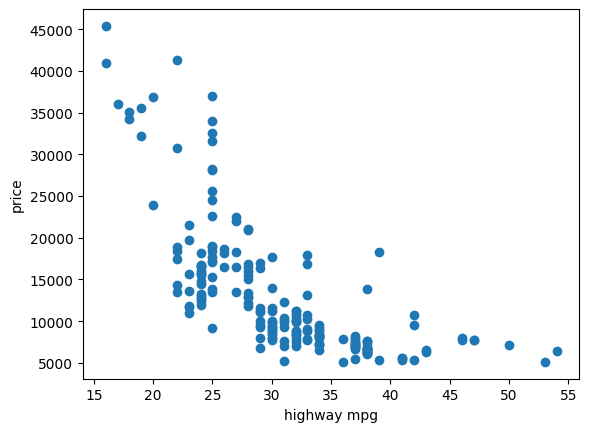

In [12]:
# Melakukan ploting data highway-mpg vs price pada scatter plot

plt.scatter(df_mobil['highway-mpg'], df_mobil['price'])
plt.xlabel("highway mpg")
plt.ylabel("price")
plt.show()

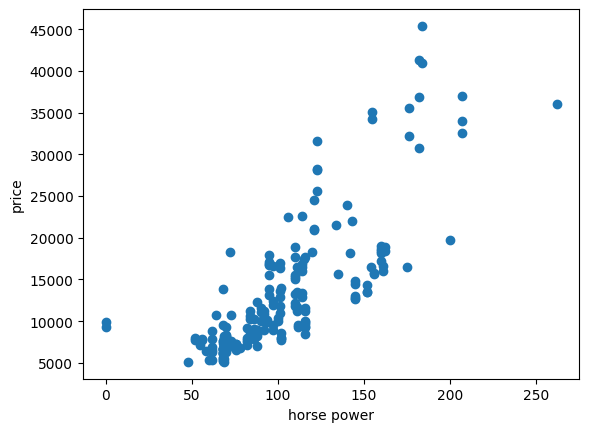

In [13]:
# Melakukan ploting data horse power vs price pada scatter plot

plt.scatter(df_mobil['horsepower'], df_mobil['price'])
plt.xlabel("horse power")
plt.ylabel("price")
plt.show()

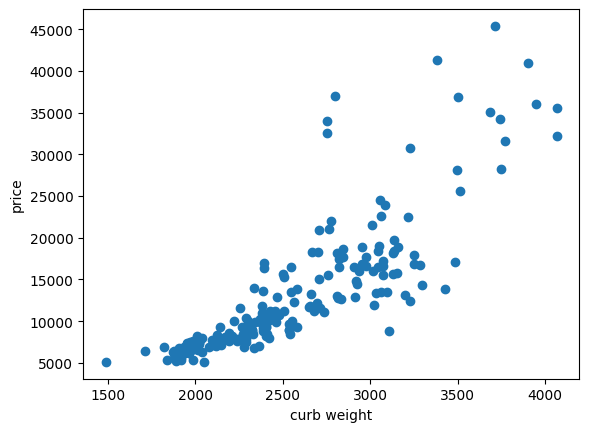

In [14]:
# Melakukan ploting data curb wight vs price pada scatter plot

plt.scatter(df_mobil['curb-weight'], df_mobil['price'])
plt.xlabel("curb weight")
plt.ylabel("price")
plt.show()

In [16]:
# Melakukan train-test-split pada 3 fitur (kolom) data diatas

X = df_mobil[['highway-mpg','curb-weight','horsepower']]
y = df_mobil[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Melakukan prediksi data dengan model machine learning (i.e. regresi linear)
# Membuat model

# Peringatan: Hati-hati menggunakan Data yang memiliki header karena dapat memunculkan error

model_regresi = LinearRegression()
model_regresi.fit(X_train.values, y_train)
model_regresi_prediksi = model_regresi.predict(X_test.values)

In [33]:
# Melihat hasil model Regresi Prediksi

print(model_regresi_prediksi[3])  # hasil prediksi
print(y.iloc[3])                  # data price Ground Truth/acuan/data asli

[9087.74460829]
price    13950
Name: 3, dtype: int64


In [34]:
# Menghitung MSE (Mean Square Error)
# Dikuadratkan supaya tidak ada nilai minus (-)
# Nanti hasilnya di-akar kuadrat

mse = str(mean_squared_error(y_test, model_regresi_prediksi))
print("MSE: " + mse)

MSE: 10952720.962991958


In [35]:
# Menghitung RMSE (Root Mean Square)

akar = str(r2_score(model_regresi_prediksi, y_test))
print("R2: " + akar)

R2: 0.7335256779534511


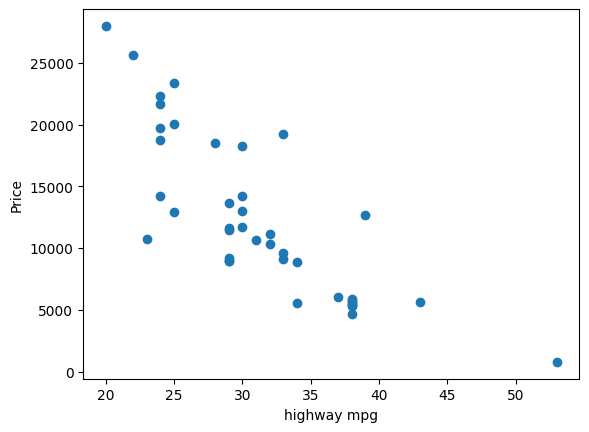

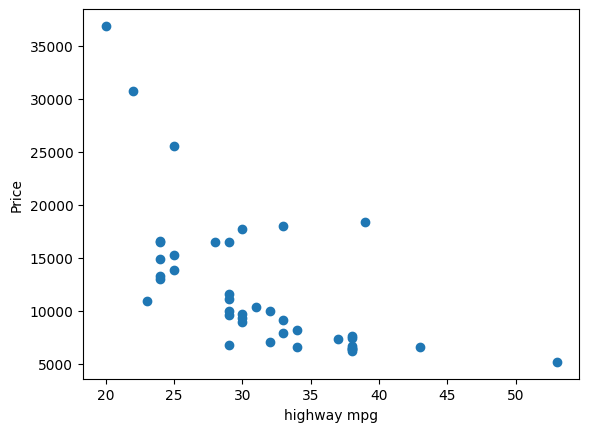

In [36]:
# Memasukkan data test kedalam model

plt.scatter(X_test.iloc[:,0], model_regresi_prediksi)
plt.xlabel("highway mpg")
plt.ylabel("Price")
plt.show()

# Menampilkan plot data test

plt.scatter(X_test.iloc[:,0], y_test)
plt.xlabel("highway mpg")
plt.ylabel("Price")
plt.show()

In [40]:
# Spesifikasi mobil Mr. X (highway-mpg = 32; curb-wight = 2328; horsepower = 85)
# Berapa prediksi harga jual mobil Mr. X?

mrx = ([[32, 2328,   85]])
mrx

model_regresi_prediksi = model_regresi.predict(mrx)
model_regresi_prediksi

array([[9747.31896063]])